In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
# Importing dataset
df = pd.read_csv('/content/train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.shape

(550068, 12)

In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

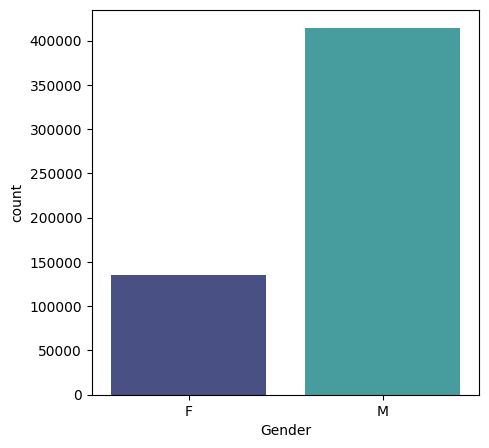

In [9]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Gender', palette='mako')

<Axes: xlabel='Gender', ylabel='Marital_Status'>

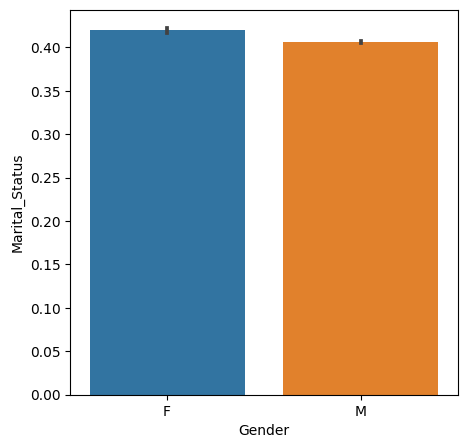

In [10]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Gender',y='Marital_Status',data=df)

<Axes: xlabel='Gender', ylabel='Purchase'>

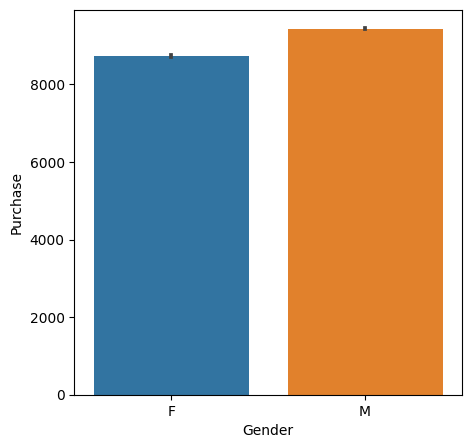

In [11]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Gender',y='Purchase',data=df)

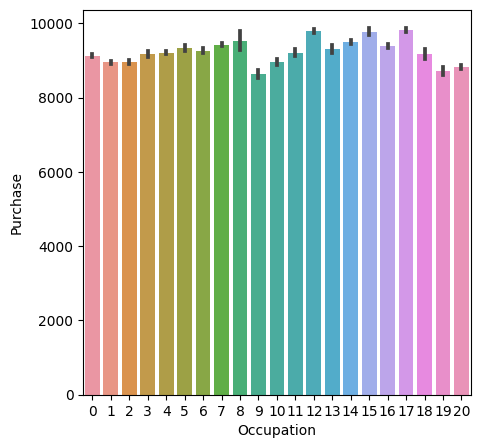

In [12]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Occupation',y='Purchase',data=df);

<Axes: xlabel='Occupation', ylabel='Purchase'>

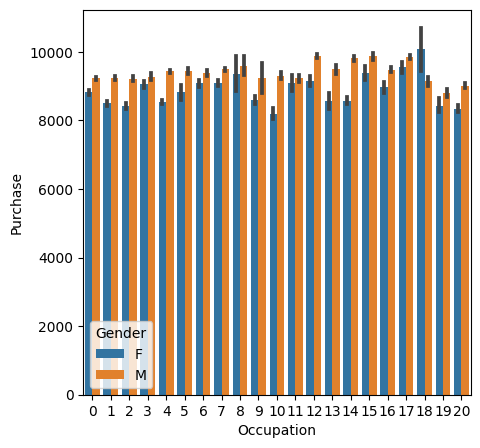

In [14]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Gender', ylabel='Purchase'>

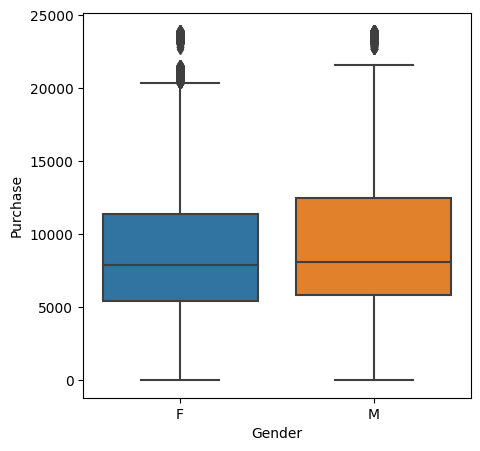

In [16]:
# Outlier Detection
# Checking the presence of outliers using Boxplot
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, x="Gender", y="Purchase")

<Axes: xlabel='Occupation', ylabel='Purchase'>

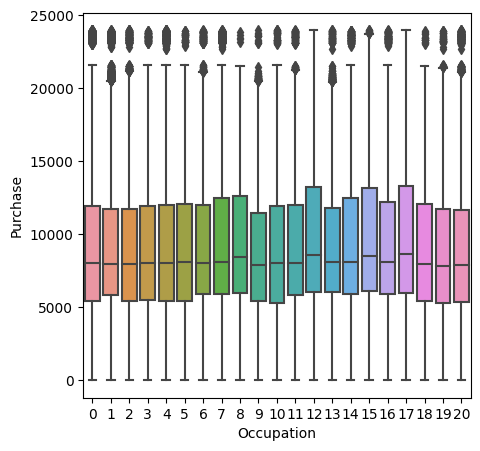

In [17]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, x="Occupation", y="Purchase")

<Axes: xlabel='Age', ylabel='Purchase'>

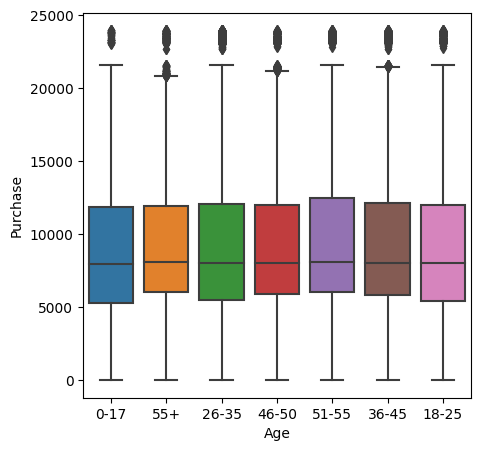

In [18]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, x="Age", y="Purchase")

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

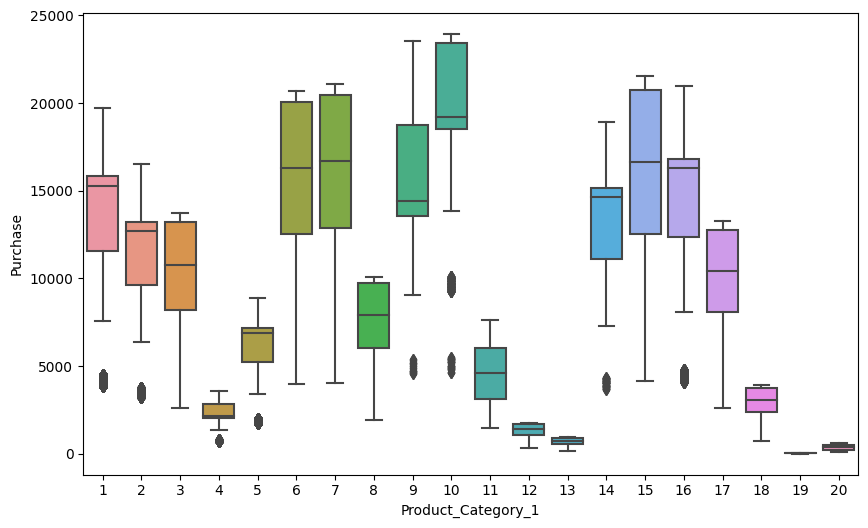

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Product_Category_1", y="Purchase")

In [21]:
# Data preprocessing
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [22]:
df['Product_ID'] = df['Product_ID'].str.replace('P00','')
ss = StandardScaler()
df['Product_ID'] = ss.fit_transform(df['Product_ID'].values.reshape(-1, 1))

In [23]:
df.drop(['Product_Category_3'],axis=1,inplace=True)

In [24]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,0.722139,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,-0.845799,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,-0.869157,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,1.077382,M,55+,16,C,4+,0,8,NaN,7969


In [25]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [26]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [27]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,0.722139,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,-0.845799,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,-0.869157,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,1.077382,M,55+,16,C,4+,0,8,9.842329,7969


In [28]:
# Label Encoding is a technique used to turn categorical variables to numeric values.
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [29]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')

In [30]:
df['Gender']=df['Gender'].astype(int)
df['Age']=df['Age'].astype(int)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [31]:
df['City_Category']=df['City_Category'].astype('category')

In [32]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,7969


<ipython-input-33-d523ae70b9fc>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]],ax=ax[i][j])
<ipython-input-33-d523ae70b9fc>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]],ax=ax[i][j])
<ipython-input-33-d523ae70b9fc>:8: UserWarning: 

`distplot` is a deprecated f

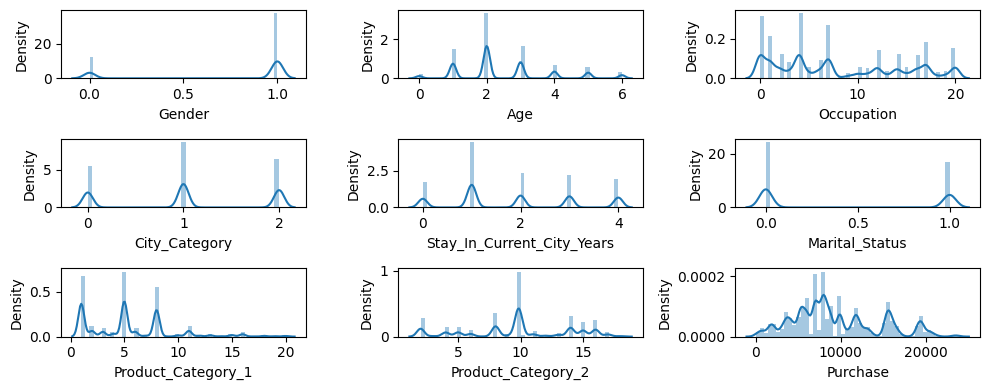

In [33]:
rows=3
cols=3
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
col=df.columns
index=2
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()

In [34]:
df['Purchase']=np.log(df['Purchase'])
df= pd.get_dummies(df)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,0,0,1


In [37]:
# Splitting the data
X=df.drop(labels=['Purchase'],axis=1)                         
y=df['Purchase']
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,0,0,1


In [38]:
y

0         9.032409
1         9.629051
2         7.259820
3         6.963190
4         8.983314
            ...   
550063    5.908083
550064    5.916202
550065    4.919981
550066    5.899897
550067    6.194405
Name: Purchase, Length: 550068, dtype: float64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
# Scaling the data
scaled=StandardScaler()
X_train=scaled.fit_transform(X_train)
X_test=scaled.transform(X_test)

In [42]:
# Linear Regression model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [43]:
y_predict = model.predict(X_test)

In [44]:
score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=(np.sqrt(mean_squared_error(y_test,y_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.20164312529706552
mean_absolute_error:  0.4556555470122346
mean_squared_error:  0.4437959072056233
root_mean_squared_error:  0.6661800861671139


In [45]:
# Decision Tree Regressor
DT=DecisionTreeRegressor(max_depth=9)
DT.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [46]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [47]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, y_train))
print('RSquared value on test:',DT.score(X_test, y_test))

RMSE TrainingData =  0.3680408214406253
RMSE TestData =  0.3689282945867095
--------------------------------------------------
RSquared value on train: 0.7519510621944241
RSquared value on test: 0.755151354861775


In [62]:
# Random Forest Regressor
RF=RandomForestRegressor().fit(X_train,y_train)

In [63]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [64]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, y_train))
print('RSquared value on test:',RF.score(X_test, y_test))

RMSE TrainingData =  0.13146763917696186
RMSE TestData =  0.34983546529998166
--------------------------------------------------
RSquared value on train: 0.9683493147344109
RSquared value on test: 0.7798384640521927


In [65]:
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [66]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [67]:
df_test['Product_ID'] = df_test['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
df_test['Product_ID'] = ss.fit_transform(df_test['Product_ID'].values.reshape(-1, 1))

In [68]:
df_test.drop(['Product_Category_3'],axis=1,inplace=True)

df_test['Product_Category_2']=df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mean())

In [69]:
df_test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

In [70]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,-0.434752,M,46-50,7,B,2,1,1,11.0
1,1000009,-0.587188,M,26-35,17,C,0,0,3,5.0
2,1000010,1.133865,F,36-45,1,B,4+,1,5,14.0
3,1000010,-0.273465,F,36-45,1,B,4+,1,4,9.0
4,1000011,-1.173330,F,26-35,1,C,1,0,4,5.0


In [71]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    df_test[i]=le.fit_transform(df_test[i])
df_test.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
dtype: object

In [72]:
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].replace('4+','4')
df_test['Gender']=df_test['Gender'].astype(int)
df_test['Age']=df_test['Age'].astype(int)
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].astype(int)
df_test['City_Category']=df_test['City_Category'].astype('category')

In [73]:
df_test= pd.get_dummies(df_test)

In [74]:
df.shape

(550068, 13)

In [75]:
df_test.shape

(233599, 12)

In [76]:
test_preds= RF.predict(df_test)
len(test_preds)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


233599

In [77]:
id_frame=pd.read_csv('/content/test.csv')

In [78]:
ID_info= id_frame[["User_ID","Product_ID"]]
ID_info.head()

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [79]:
predictions= pd.DataFrame(test_preds, columns=["Purchase"])
predictions["User_ID"]= ID_info["User_ID"]
predictions["Product_ID"]= ID_info["Product_ID"]
predictions.head()

,Purchase,User_ID,Product_ID
0,9.534004,1000004,P00128942
1,9.542074,1000009,P00113442
2,4.528230,1000010,P00288442
3,4.528230,1000010,P00145342
4,4.529188,1000011,P00053842


In [80]:
predictions.to_csv('/content/BlackFridayPredictions.csv', index=False)